In [38]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

In [7]:
dataset = pd.read_csv("Marketing_Spending.csv")

In [20]:
dataset.isnull().sum()

Marketing Spending    0
Profit                0
dtype: int64

In [8]:
dataset

,Marketing Spending,Profit
0,165349.20,192261.83
1,162597.70,191792.06
2,153441.51,191050.39
3,144372.41,182901.99
4,142107.34,166187.94
5,131876.90,156991.12
6,134615.46,156122.51
7,130298.13,155752.60
8,120542.52,152211.77
9,123334.88,149759.96


In [34]:
Y = dataset.iloc[:, 1].values
Y
# type(Y)

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [46]:
# Scikit learn s'attend à avoir plusieurs parametres, d'où le fait qu'il faut passer une liste pour créer X (array)
X = dataset.loc[:, ["Marketing Spending"]] .values
X

array([[165349.2 ],
       [162597.7 ],
       [153441.51],
       [144372.41],
       [142107.34],
       [131876.9 ],
       [134615.46],
       [130298.13],
       [120542.52],
       [123334.88],
       [101913.08],
       [100671.96],
       [ 93863.75],
       [ 91992.39],
       [119943.24],
       [114523.61],
       [ 78013.11],
       [ 94657.16],
       [ 91749.16],
       [ 86419.7 ],
       [ 76253.86],
       [ 78389.47],
       [ 73994.56],
       [ 67532.53],
       [ 77044.01],
       [ 64664.71],
       [ 75328.87],
       [ 72107.6 ],
       [ 66051.52],
       [ 65605.48],
       [ 61994.48],
       [ 61136.38],
       [ 63408.86],
       [ 55493.95],
       [ 46426.07],
       [ 46014.02],
       [ 28663.76],
       [ 44069.95],
       [ 20229.59],
       [ 38558.51],
       [ 28754.33],
       [ 27892.92],
       [ 23640.93],
       [ 15505.73],
       [ 22177.74],
       [  1000.23],
       [  1315.46],
       [     0.  ],
       [   542.05],
       [     0.  ]])

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=0)

In [58]:
"""
Lorsqu'on normalise, on calcule la moyenne de la colonne donneé. Ensuite on calcul la standard deviation
Pour chaque ligne, on soustrait la moyenne et on divise par la standard deviation
La normalisation n'est pas vraiment indispensable lorsque il y a une seule variable explicative
"""

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [59]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [60]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [61]:
predictions = lm.predict(X_test)

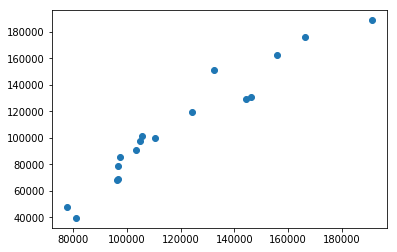

In [62]:
plt.scatter(y_test, predictions)

In [63]:
from sklearn import metrics
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, predictions))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, predictions))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 15511.899345472148
Mean Squared Error: 348824086.47761446
Root Mean Squared Error: 18676.832881342983
